## Установка библиотек для чтения pq-файлов

In [1]:
!pip install fastparquet 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 1.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 3.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 2.8 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install pyarrow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.7/22.7 MB 2.9 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import pandas as pd

# Проект 03. Кредитный скоринг

**Кредитный скоринг** является важной банковской задачей. 

Стандартный подход заключается в построении классических моделей машинного обучения, таких как логистическая регрессия и градиентный бустинг на табличных данных, в том числе с использованием *агрегирования* из некоторых последовательных данных, таких как истории транзакций клиентов. 


### Описание полей:
- id - identifier of the application
- <span style = 'color : red'> **flag** </span> - target (целевая переменная)
- pre_since_opened - days from credit opening date to data collection date
- pre_since_confirmed - days from credit information confirmation date till data collection date
- pre_pterm - planned number of days from credit opening date to closing date
- pre_fterm - actual number of days from credit opening date to closing date
- pre_till_pclose - planned number of days from data collection date until loan closing date
- pre_till_fclose - actual number of days from data collection date until loan closing date
- pre_loans_credit_limit - credit limit
- pre_loans_next_pay_summ - amount of the next loan payment
- pre_loans_outstanding - outstanding loan amount
- pre_loans_total_overdue - current overdue amount
- pre_loans_max_overdue_sum - maximum overdue amount
- pre_loans_credit_cost_rate - total cost of credit
- pre_loans5 - number of delinquencies of up to 5 days
- pre_loans530 - number of delinquencies from 5 to 30 days
- pre_loans3060 - number of delinquencies from 30 to 60 days
- pre_loans6090 - number of delinquencies from 60 to 90 days
- pre_loans90 - number of delinquencies of more than 90 days
- is_zero_loans_5 - flag: no delinquencies of up to 5 days
- is_zero_loans_530 - flag: no delinquencies of 5 to 30 days
- is_zero_loans_3060 - flag: no delinquencies of 30 to 60 days
- is_zero_loans_6090 - flag: no delinquencies of 60 to 90 days
- is_zero_loans90 - flag: no delinquencies of more than 90 days
- pre_util - ratio of outstanding loan amount to credit limit
- pre_over2limit - ratio of currently overdue debt to credit limit
- pre_maxover2limit - ratio of maximum overdue debt to credit limit
- is_zero_util - flag: ratio of outstanding loan amount to credit limit equals 0
- is_zero_over2limit - flag: ratio of current overdue debt to credit limit equals 0
- is_zero_maxover2limit - flag: ratio of maximum overdue debt to credit limit equals 0
- **<span style = 'color : blue'> enc_paym_{0…n} </span>** - monthly payment statuses of the last n months
- enc_loans_account_holder_type - type of relation to the loan
- enc_loans_credit_status - credit status
- enc_loans_account_cur - currency of the loan
- enc_loans_credit_type - credit type
- pclose_flag - flag: planned number of days from opening date to closing date of the loan
- fclose_flag - flag: actual number of days from credit opening date to closing date undefined

# Submission

Вам необходимо проскорить файл **'P03_test.pq'** и записать 2 столбца:
- id
- prediction



# Open files

In [2]:
df_train = pd.read_parquet('./parquets/P03_train.pq')
df_test = pd.read_parquet('./parquets/P03_test.pq')

In [46]:
df_train.drop_duplicates()
# drop duplicates


df_train

,id,flag,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,...,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
0,41794,0,3,9,16,9,15,14,16,3,...,3,3,3,4,1,3,4,1,0,0
1,160704,0,9,6,0,1,0,4,1,3,...,3,3,3,4,1,2,3,1,0,0
2,41771,0,12,16,14,8,10,11,10,2,...,3,3,3,4,1,2,3,1,0,1
3,160727,0,7,9,17,16,14,8,14,3,...,3,3,3,4,1,2,4,1,0,0
4,160729,0,9,9,4,8,1,11,10,3,...,3,3,3,4,1,2,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174995,139909,0,12,6,4,8,7,2,19,2,...,3,3,3,4,1,3,5,1,0,0
174996,10639,0,12,5,4,8,7,11,4,2,...,3,3,3,4,1,2,4,1,0,1
174997,4951,0,12,9,3,8,1,11,19,2,...,3,3,3,4,1,2,4,1,0,1
174998,77107,0,12,9,4,8,1,11,0,5,...,3,3,3,4,1,2,3,1,1,1


In [47]:
df_test

,id,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,...,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
0,225096,7,16,6,8,0,11,2,0,1,...,3,3,3,4,1,2,0,1,0,1
1,220040,7,10,17,8,8,11,10,2,3,...,3,3,3,4,1,2,3,1,0,1
2,26535,3,9,2,14,7,15,8,4,3,...,1,1,0,4,1,3,4,1,0,0
3,77272,7,9,2,10,8,8,16,4,2,...,3,3,3,4,1,2,4,1,0,0
4,193584,19,5,7,8,1,11,6,1,4,...,3,3,3,4,1,2,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,199075,19,9,4,8,1,11,17,4,3,...,3,3,3,4,1,2,3,1,1,1
74996,244188,5,12,17,16,1,11,0,2,3,...,3,3,3,4,1,3,2,1,0,0
74997,40363,9,1,3,5,2,6,17,2,3,...,3,3,3,4,1,3,3,1,0,0
74998,217364,19,6,15,9,12,11,13,6,3,...,3,3,3,4,1,2,4,1,0,0


In [3]:
X = df_train.drop('flag', axis=1)
y = df_train['flag']

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=8)

In [21]:
df_train['flag'].value_counts()

flag
0    169574
1      5426
Name: count, dtype: int64

## Data over-under sampling

In [113]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=8,k_neighbors=3,sampling_strategy='all')
X_train, y_train = sm.fit_resample(X_train, y_train)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=8)

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=8)

X_train, y_train = rus.fit_resample(X_train, y_train)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

from imblearn.under_sampling import AllKNN
allknn = AllKNN()

X_train, y_train = allknn.fit_resample(X_train, y_train)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=8)

from imblearn.under_sampling import CondensedNearestNeighbour
cnn = CondensedNearestNeighbour(random_state=8)

X_train, y_train = cnn.fit_resample(X_train, y_train)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

from imblearn.under_sampling import NearMiss

nm = NearMiss(version=3)
X_train, y_train = nm.fit_resample(X_train, y_train)

### TomekLinks is best undersampling

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

from imblearn.under_sampling import TomekLinks
tl = TomekLinks()

X_train, y_train = tl.fit_resample(X_train, y_train)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=8888)

X_train, y_train = smote_tomek.fit_resample(X_train, y_train)

In [12]:
y_train.value_counts()

flag
0    5426
1    5426
Name: count, dtype: int64

## training

In [6]:
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier


model = xgb.XGBClassifier(objective='binary:logistic')
clf = BaggingClassifier(estimator=model, n_estimators=20, random_state=8).fit(X_train, y_train)

In [7]:
from sklearn.metrics import classification_report

y_true_pred = clf.predict(X_test)

print(classification_report(y_test, y_true_pred))

              precision    recall  f1-score   support

           0       0.98      0.64      0.77     16956
           1       0.06      0.67      0.10       544

    accuracy                           0.64     17500
   macro avg       0.52      0.66      0.44     17500
weighted avg       0.96      0.64      0.75     17500



In [13]:
from sklearn.metrics import classification_report

y_true_pred = clf.predict(X_test)

print(classification_report(y_test, y_true_pred))

              precision    recall  f1-score   support

           0       0.99      0.66      0.79     16956
           1       0.08      0.89      0.14       544

    accuracy                           0.67     17500
   macro avg       0.54      0.77      0.47     17500
weighted avg       0.97      0.67      0.77     17500



In [54]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

nm = NearMiss(version=3)
X_train, y_train = nm.fit_resample(X_train, y_train)

In [29]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
from sklearn.metrics import classification_report


def calculate_metrics(features):
    X = df_train[features]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

    nm = NearMiss(version=3)
    X_train, y_train = nm.fit_resample(X_train, y_train)
    
    clf = xgb.XGBClassifier(objective='binary:logistic').fit(X_train, y_train)
    

    y_true_pred = clf.predict(X_test)

    print(classification_report(y_test, y_true_pred))

In [30]:
all_features = [col for col in X.columns]

all_features.remove('id')

for col in all_features:
    print(f"without {col}")
    features = all_features
    features.remove(col)
    calculate_metrics(features)
    
    print("!!!!!!!!!!!!!!!!!!!!!" * 2)

without pre_since_opened
              precision    recall  f1-score   support

           0       0.98      0.47      0.63     33945
           1       0.04      0.70      0.07      1055

    accuracy                           0.47     35000
   macro avg       0.51      0.58      0.35     35000
weighted avg       0.95      0.47      0.61     35000

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
without pre_pterm
              precision    recall  f1-score   support

           0       0.98      0.47      0.64     33945
           1       0.04      0.70      0.08      1055

    accuracy                           0.48     35000
   macro avg       0.51      0.59      0.36     35000
weighted avg       0.95      0.48      0.62     35000

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
without pre_till_pclose
              precision    recall  f1-score   support

           0       0.98      0.48      0.64     33945
           1       0.04      0.70      0.08      1055

    accuracy                 

              precision    recall  f1-score   support

           0       0.98      0.46      0.63     33945
           1       0.04      0.71      0.07      1055

    accuracy                           0.47     35000
   macro avg       0.51      0.59      0.35     35000
weighted avg       0.95      0.47      0.61     35000

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
without enc_paym_16
              precision    recall  f1-score   support

           0       0.98      0.46      0.63     33945
           1       0.04      0.71      0.07      1055

    accuracy                           0.47     35000
   macro avg       0.51      0.58      0.35     35000
weighted avg       0.95      0.47      0.61     35000

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
without enc_paym_18
              precision    recall  f1-score   support

           0       0.98      0.46      0.63     33945
           1       0.04      0.70      0.07      1055

    accuracy                           0.47     35000
  

In [14]:
y_pred = clf.predict_proba(X_test)
y_pred[:-10]

array([[0.19047532, 0.80952468],
       [0.45108425, 0.54891576],
       [0.8397217 , 0.1602783 ],
       ...,
       [0.29210349, 0.70789651],
       [0.29535833, 0.70464167],
       [0.83462763, 0.16537237]])

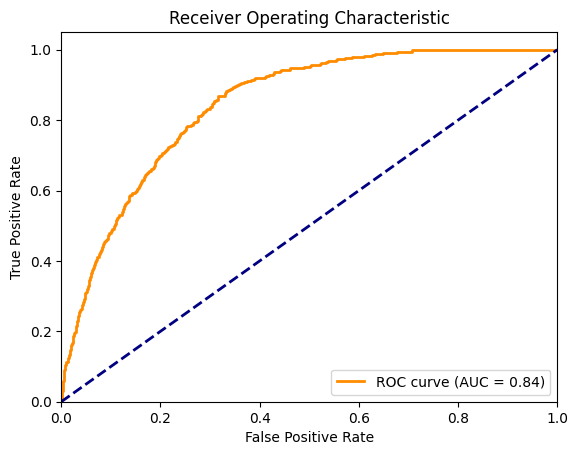

0.8441481975840585


In [15]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Имея истинные метки классов и предсказанные вероятности класса "1":
y_pred_proba = clf.predict_proba(X_test)[:,1]

# Вычислить значения TPR и FPR для построения графика ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Вычислить AUC
auc_score = auc(fpr, tpr)

# Построение графика ROC
def plot_roc(fpr, tpr):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
plot_roc(fpr, tpr)
print(auc_score)

In [16]:
from sklearn.metrics import classification_report

y_true_pred = y_pred[:,1]

y_true_pred = [0 if x < auc_score else 1 for x in y_true_pred]

print(classification_report(y_test, y_true_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     16956
           1       0.19      0.17      0.18       544

    accuracy                           0.95     17500
   macro avg       0.58      0.57      0.58     17500
weighted avg       0.95      0.95      0.95     17500



In [45]:
from sklearn.metrics import classification_report

y_true_pred = y_pred[:,1]

y_true_pred = [0 if x < auc_score else 1 for x in y_true_pred]

print(classification_report(y_test, y_true_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     33945
           1       0.15      0.00      0.01      1055

    accuracy                           0.97     35000
   macro avg       0.56      0.50      0.50     35000
weighted avg       0.95      0.97      0.95     35000



# CSV AND SUBMISSION

In [11]:
rus = RandomUnderSampler(random_state=8)

X_train, y_train = rus.fit_resample(X, y)

clf.fit(X_train, y_train)

BaggingClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                  n_estimators=20, random_state=8)

In [17]:
y_pred = clf.predict_proba(df_test)
y_pred[:-10]

array([[0.89127508, 0.10872493],
       [0.52079221, 0.47920779],
       [0.2191451 , 0.7808549 ],
       ...,
       [0.79701998, 0.20298002],
       [0.70269949, 0.2973005 ],
       [0.15602028, 0.84397972]])

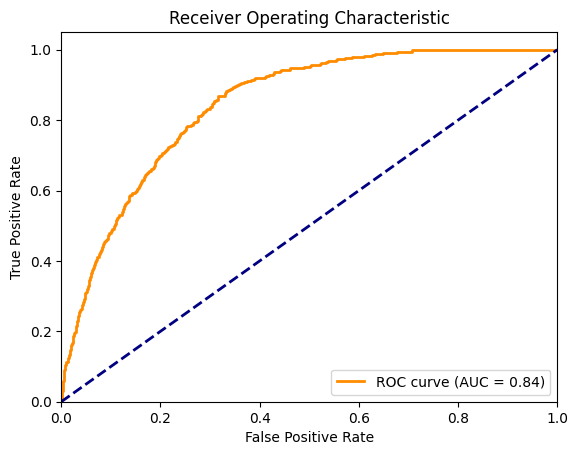

0.8441481975840585


In [18]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Имея истинные метки классов и предсказанные вероятности класса "1":
y_pred_proba = clf.predict_proba(X_test)[:,1]

# Вычислить значения TPR и FPR для построения графика ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Вычислить AUC
auc_score = auc(fpr, tpr)

# Построение графика ROC
def plot_roc(fpr, tpr):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
plot_roc(fpr, tpr)
print(auc_score)

In [19]:
y_true_pred = y_pred[:,1]

y_pred_answer = [0 if x < auc_score else 1 for x in y_true_pred]

In [20]:
y_pred_answer

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,


In [21]:
ddd = {'ID': df_test['id'], 'prediction': y_pred_answer}
final_answer = pd.DataFrame(data=ddd)
final_answer

,ID,prediction
0,225096,0
1,220040,0
2,26535,0
3,77272,1
4,193584,0
...,...,...
74995,199075,0
74996,244188,0
74997,40363,0
74998,217364,0


In [22]:
from pathlib import Path  
filepath = Path('/Users/dimmyt/Documents/PyCharmProjects/N--DS/N! weekly/weekly3/P03/answer.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
final_answer.to_csv(filepath, index=False)  